In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rho
theme, cs = rho.mpl_setup(False, True)

<Figure size 576x432 with 0 Axes>

# Colormaps for Quantitative Data

Many data visualizations use color to encode continuous numeric data. Existing Python visualization libraries like `matplotlib`, `seaborn`, `plotly`, and `bokeh` all have different colormaps for this purpose. Rho+ has its own set of palettes. 

Why have custom palettes when so many already exist? There are a couple reasons:

 - Rho+ has color palettes that fill gaps in the palettes offered by some major plotting libraries.
 - Rho+ has a specific emphasis on color palettes that work well in both dark and light color modes, which many existing libraries do not.
 - Rho+ palettes can be converted to the formats that other libraries use, which enables cohesive aesthetics across many Python tools.

[Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and [Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html) have excellent primers on color palettes. This library also takes inspiration from [Colorcet](https://colorcet.holoviz.org/index.html). These pages are highly recommended reading for the data visualization practitioner.

## Evaluating Colormaps

The main resource on colormap design used in this library is a paper by Peter Kovesi, [*Good Colour Maps: How to Design Them*.](https://doi.org/10.48550/arXiv.1509.03700) One tool used in the paper that we will use to evaluate sequential colormaps is the following sine-comb image:

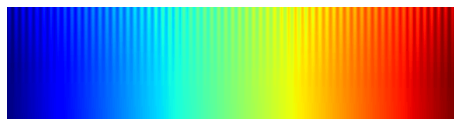

In [3]:
def teeth_plot(palette):
    plt.imshow(plt.imread('colourmaptest.tif'), cmap=palette)
    plt.gca().set_axis_off()    

teeth_plot('jet')

This image is most effective when used at a normal viewing distance on a computer monitor.

There are a couple things to look for when evaluating a colormap using this image:
 - The periodic variation in the numbers being plotted is perfectly even, so when plotted using a colormap all of the "teeth" should appear equally long. We can see here that the `jet` colormap exaggerates variation around light blue and orange and minimizes perceived distances in the middle green area.
 - The longer the teeth look, the more that small variations in plotted data will be visible. Ideally we want as much resolution as is possible given the constraints of our environment. `jet` has quite good resolution in some areas, but it is still unusable as a serious colormap due to its inconsistency.
 - Ideally our colormaps are distinguishable for colorblind users. Jet has serious issues with this, and some of the Rho+ palettes will as well. Palettes that are readable for users with colorblindness will be highlighted.

## Sequential Colormaps

These are colormaps that can represent a single numerical axis—from low to high. An example use case would be showing the body mass of the penguins displayed in the scatterplot below.

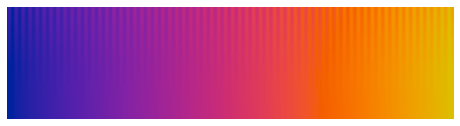

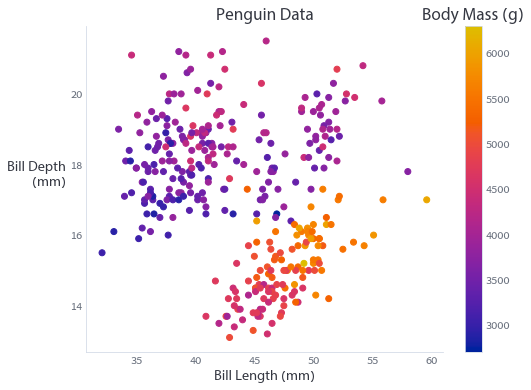

In [4]:
pg = sns.load_dataset('penguins')

def scatterplot(palette):
    plt.scatter(data=pg, x='bill_length_mm', y='bill_depth_mm', c='body_mass_g', cmap=palette)
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Bill Depth\n(mm)', rotation='horizontal', ha='right')
    plt.title('Penguin Data')
    clb = plt.colorbar()
    clb.ax.set_title('Body Mass (g)')

teeth_plot('rho_inferna')
plt.show()
scatterplot('rho_inferna')

This is `inferna`, Rho+'s version of matplotlib's `inferno`. 

 - Like `inferno`, the color palette is approximately perceptually uniform: the teeth are about equally long.
 - `inferna` also retains the same good resolution. Note how you can clearly see that, within the separate clusters (different species of penguin), we can see that body mass increases along with bill depth and length.

Unlike `inferno`, `inferna` has a smaller range of lightness values, which makes it suitable for scatterplots on dark or light backgrounds. Compare `inferno` to see how it isn't suitable for plotting on a dark background:

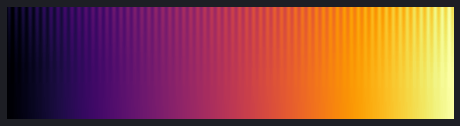

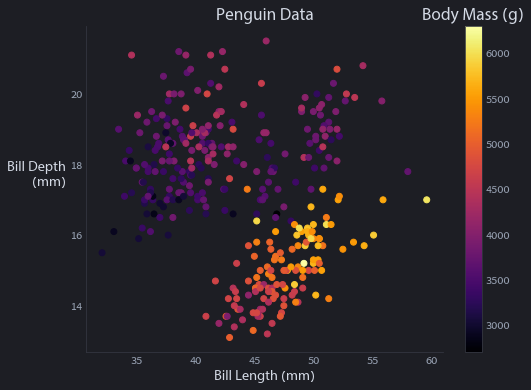

In [5]:
with plt.style.context(rho.mpl_setup(True, False)[0]):
    teeth_plot('inferno')
    plt.show()
    scatterplot('inferno')

The other major sequential palette in Rho+ is `viridia`, a version of `viridis` that also maintains a smaller total range of lightness variation.

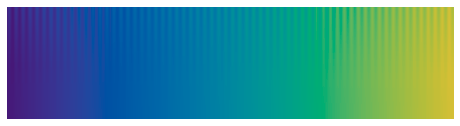

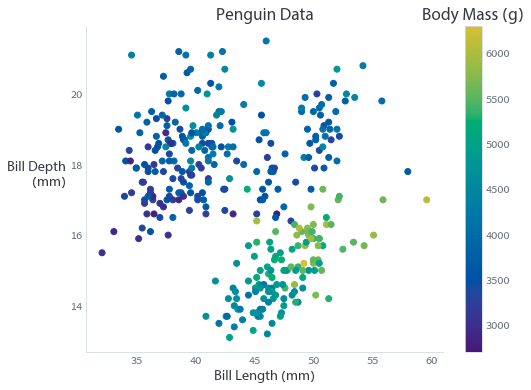

In [6]:
teeth_plot('rho_viridia')
plt.show()
scatterplot('rho_viridia')

Both of these palettes are good workhorses. They're suitable for dark or light backgrounds, as their own background in a heatmap or choropleth map, and for users with common forms of colorblindness. If you don't know what palette to use, and you have data that goes from low to high, it's hard to go wrong with either one.

### Maximal-Resolution Colormaps For Heatmaps and Choropleth Maps

If you are using a palette as the background in a heatmap or choropleth map, then there is no need to worry about not using very dark or light colors, and having colormaps that go from almost black to almost white provides maximal resolution. Rho+ offers two of these: `umbra` and `gouldia`.

`umbra` is similar to matplotlib's `magma`, but with more even saturation throughout:

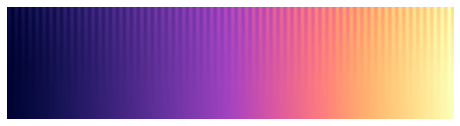

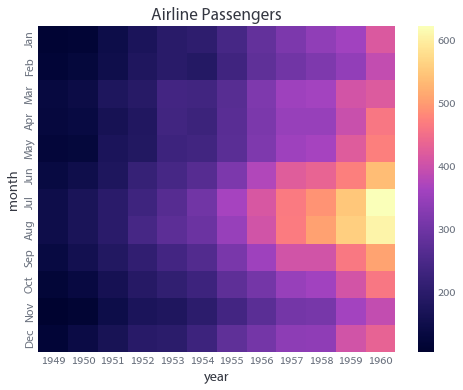

In [7]:
flights = sns.load_dataset('flights').pivot('month', 'year', 'passengers')
def heatmap_plot(palette):
    sns.heatmap(flights, fmt='d', cmap=palette)
    plt.title('Airline Passengers')

teeth_plot('rho_umbra')
plt.show()
heatmap_plot('rho_umbra')

`gouldia` is a version of Colorcet's `gouldian` map, analogous to `viridia`:

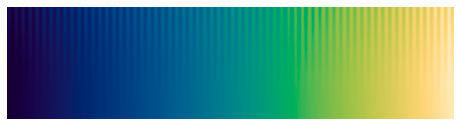

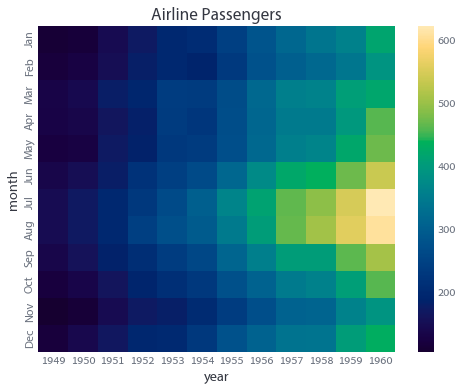

In [8]:
teeth_plot('rho_gouldia')
plt.show()
heatmap_plot('rho_gouldia')

## Diverging Colormaps

Some data has a clear center, such that deviations on either side of that center should be clearly visible. Rho+ provides two classic blue-red palettes that should fill most needs. `rho_coolwarm` goes from blue to light gray to red, and `rho_icefire` goes from blue to black to red. These are both similar to the seaborn colormaps `coolwarm` and `icefire`, hence the naming. Note that the middle of each is smoothed out, because otherwise the sharp change in lightness creates a phantom feature in the data.

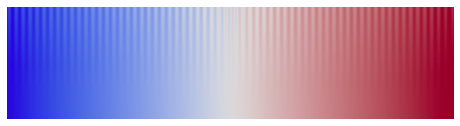

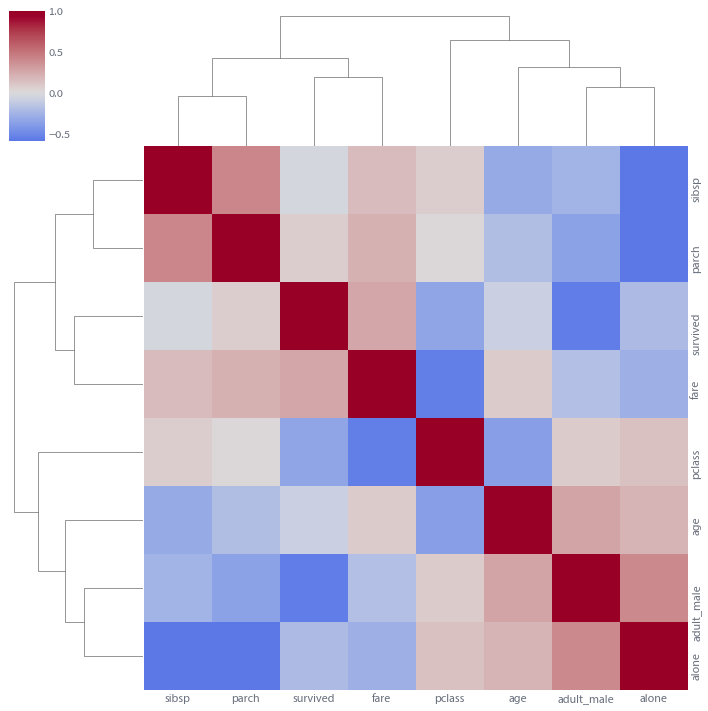

In [9]:
def corr_map(palette):
    sns.clustermap(sns.load_dataset('titanic').corr(), center=0, cmap=palette)

teeth_plot('rho_div_coolwarm')
corr_map('rho_div_coolwarm')

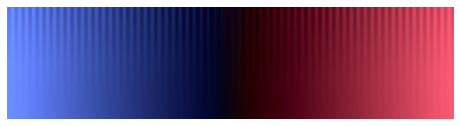

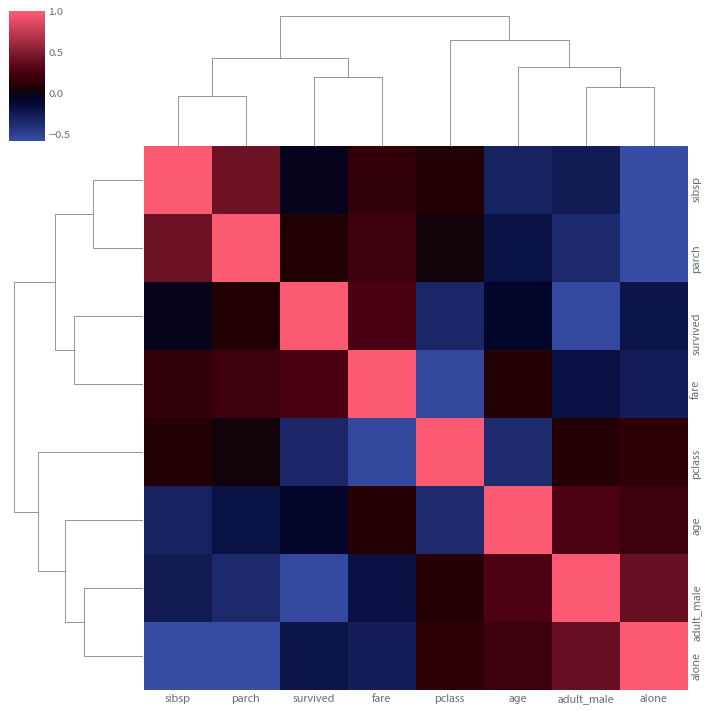

In [10]:
teeth_plot('rho_div_icefire')
corr_map('rho_div_icefire')

If higher resolution is desired, there are two other versions that cover a range of hues on either side and not just a single shade of blue and red. These are `div_coolwarm_shift` and `div_icefire_shift`.

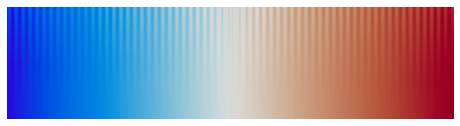

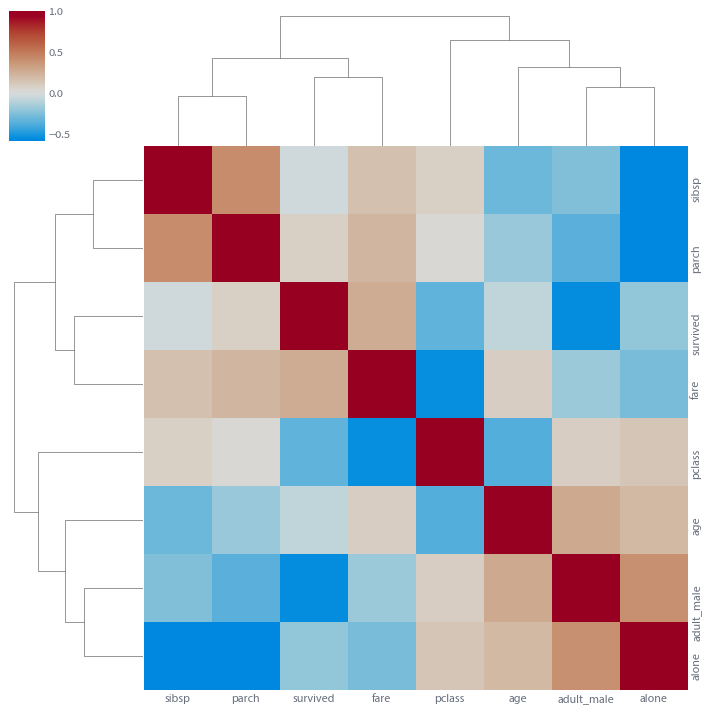

In [12]:
teeth_plot('rho_div_coolwarm_shift')
corr_map('rho_div_coolwarm_shift')

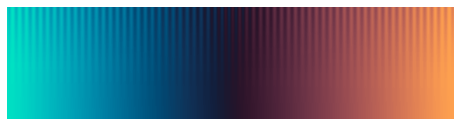

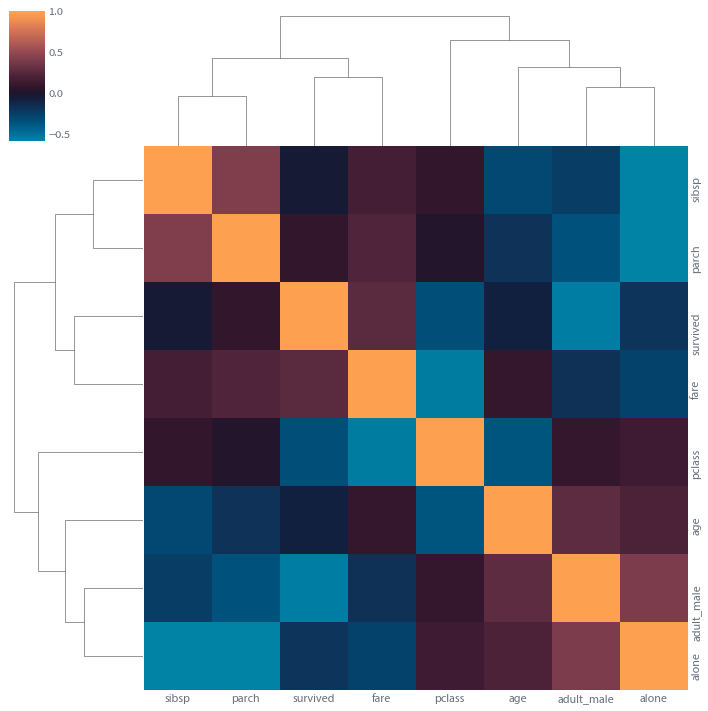

In [11]:
teeth_plot('rho_div_icefire_shift')
corr_map('rho_div_icefire_shift')

There is also a diverging rainbow colormap in Rho+. This is not colorblind-safe and is not generally recommended, but if you want it you can use it. Note that yellow is the center (because it's the lightest color, so it has to be the center to ensure symmetry), which isn't how we normally think of the rainbow.

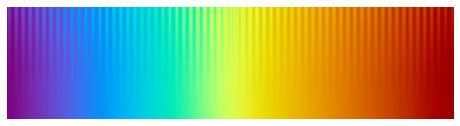

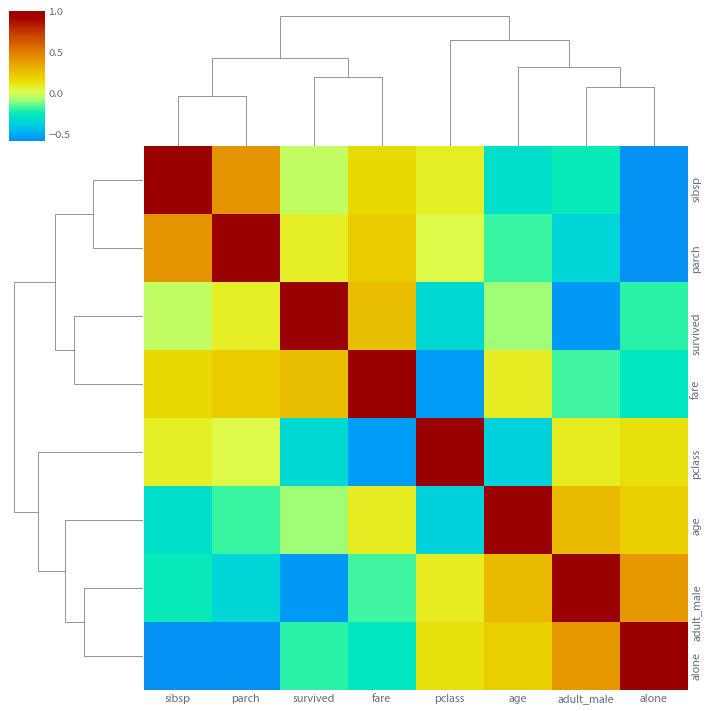

In [13]:
teeth_plot('rho_div_spectra')
corr_map('rho_div_spectra')

## Harmonious Colormaps

Sometimes maximum information density is not important—perhaps color is redundant, or the marks being shaded are large and easy to tell apart. In that case, graphs can look nicer when the colors harmonize more, and so restricting the range of colors used can produce aesthetically nicer plots. Rho+ has four such colormaps: `solara`, `frutta`, `glacia`, and `ignia`. Use these when you don't need the resolution that `viridia` and `inferna` offer or you want your Instagram post to be more stylish. These are all colorblind-safe.

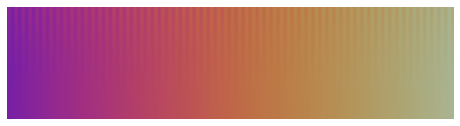

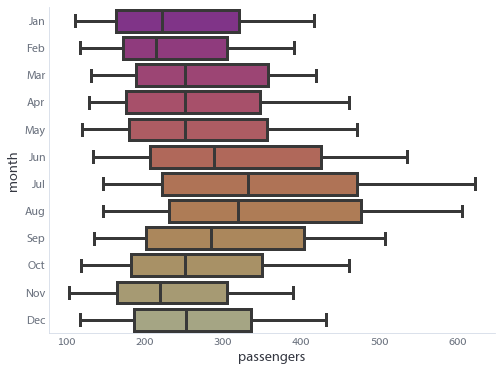

In [15]:
from matplotlib import colors as plt_colors
import numpy as np

flights = sns.load_dataset('flights')

def boxplot(palette):
    sns.boxplot(data=flights, x='passengers', y='month', palette=palette)

teeth_plot('rho_solara')
plt.show()
boxplot('rho_solara')

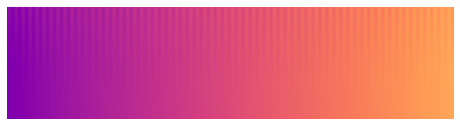

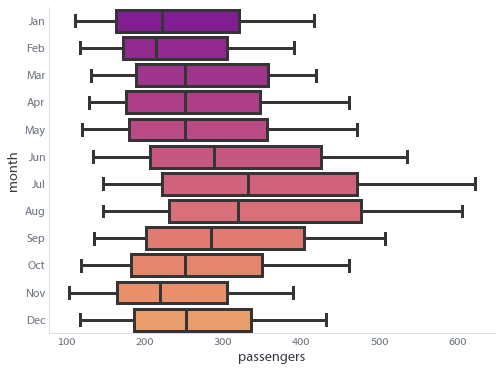

In [16]:
teeth_plot('rho_frutta')
plt.show()
boxplot('rho_frutta')

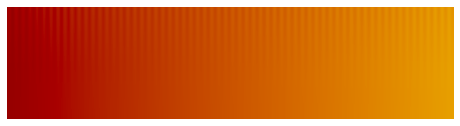

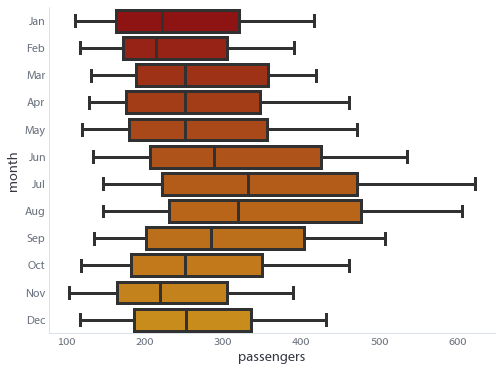

In [17]:
teeth_plot('rho_ignia')
plt.show()
boxplot('rho_ignia')

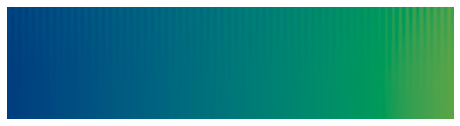

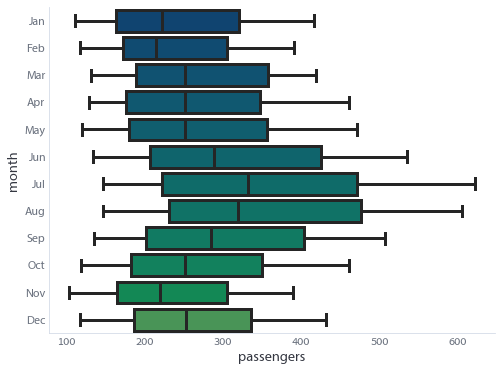

In [18]:
teeth_plot('rho_glacia')
plt.show()
boxplot('rho_glacia')

## Isoluminant Colormaps

When color distinguishability is not a concern (for instance, color is redundant or colors are in big blocks), using a colormap in which every color is the same luminance can make sure nothing stands out too much and can improve aesthetic appeal. Rho+ has three such colormaps: `iso_spectra`, `iso_glacia`, and `iso_frutta`. `iso_spectra` is the equivalent to Seaborn's `husl` and is usable to generate many different categories or when you want an equal-lightness rainbow colormap. Note the teeth plots here are far less distinct: at small scales, luminance is the primary way we distinguish color, and so not varying luminance results in a lot of lost resolution.

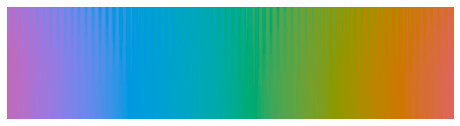

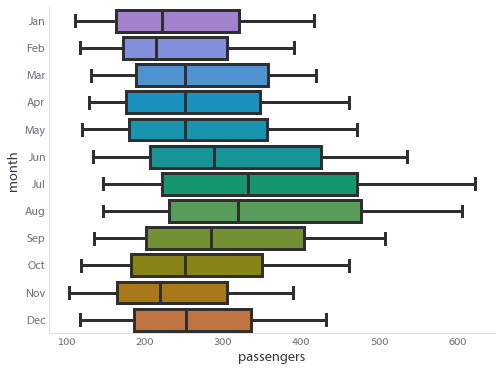

In [19]:
teeth_plot('rho_iso_spectra')
plt.show()
boxplot('rho_iso_spectra')

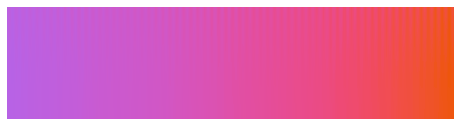

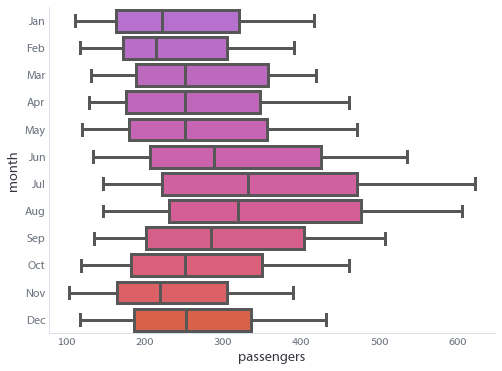

In [20]:
teeth_plot('rho_iso_frutta')
plt.show()
boxplot('rho_iso_frutta')

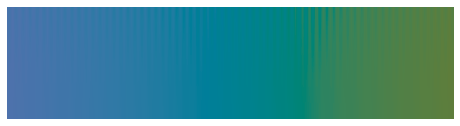

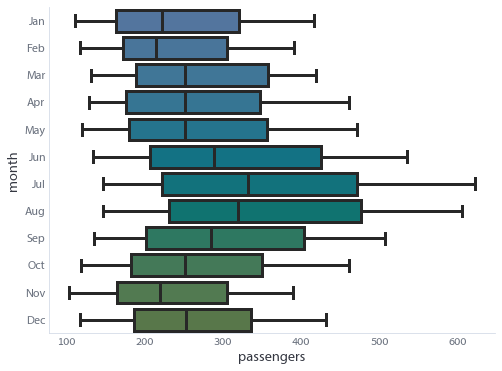

In [21]:
teeth_plot('rho_iso_glacia')
plt.show()
boxplot('rho_iso_glacia')

## Rainbow Colormap

Rainbow colormaps are not a good default for basically any data visualization application: they are often completely unusable for colorblind viewers, can make simple comparisons difficult, and generally perform less well in experiments than colormaps like the ones you've seen so far. But no palette library seems to be complete without one of these, and in some specific scenarios the extra resolution gained by using all of the available colors outweighs those downsides. Hence `spectra`, the rainbow colormap in Rho+. Use it as an alternative to `turbo` that is better than `jet`.

As a test image, I'll use the 3D depth image that [Google's `turbo` colormap](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html) used as a showcase. In such an image, it is often more important to quickly see if two objects are roughly the same depth than it is to compare differences (is this object closer to this one or that one?), and so the weaknesses of a rainbow colormap aren't as important.

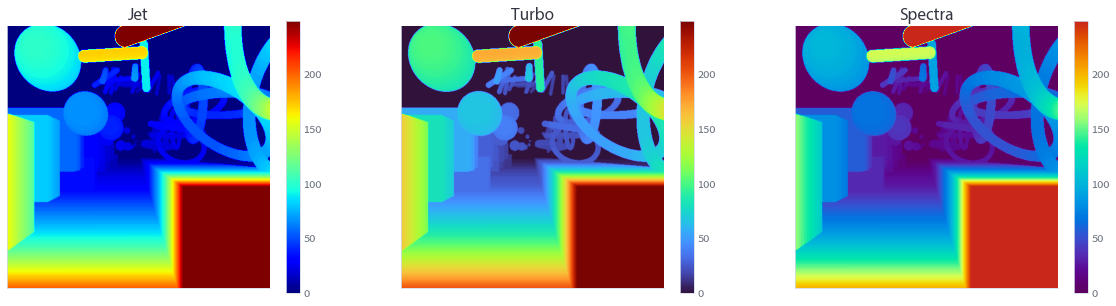

In [22]:
from PIL import Image
import urllib


a = np.array(Image.open(urllib.request.urlopen('https://www.dropbox.com/s/zli2usov4su4ykg/depth-image.png?raw=1')))[:, :, 0]

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax, cmap, name in zip(axs, ('jet', 'turbo', 'rho_spectra'), ('Jet', 'Turbo', 'Spectra')):
    im = ax.imshow(a, cmap=cmap)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_title(name)
    fig.colorbar(im, ax=ax)